In [12]:
import numpy as np
import matplotlib.pyplot as plt

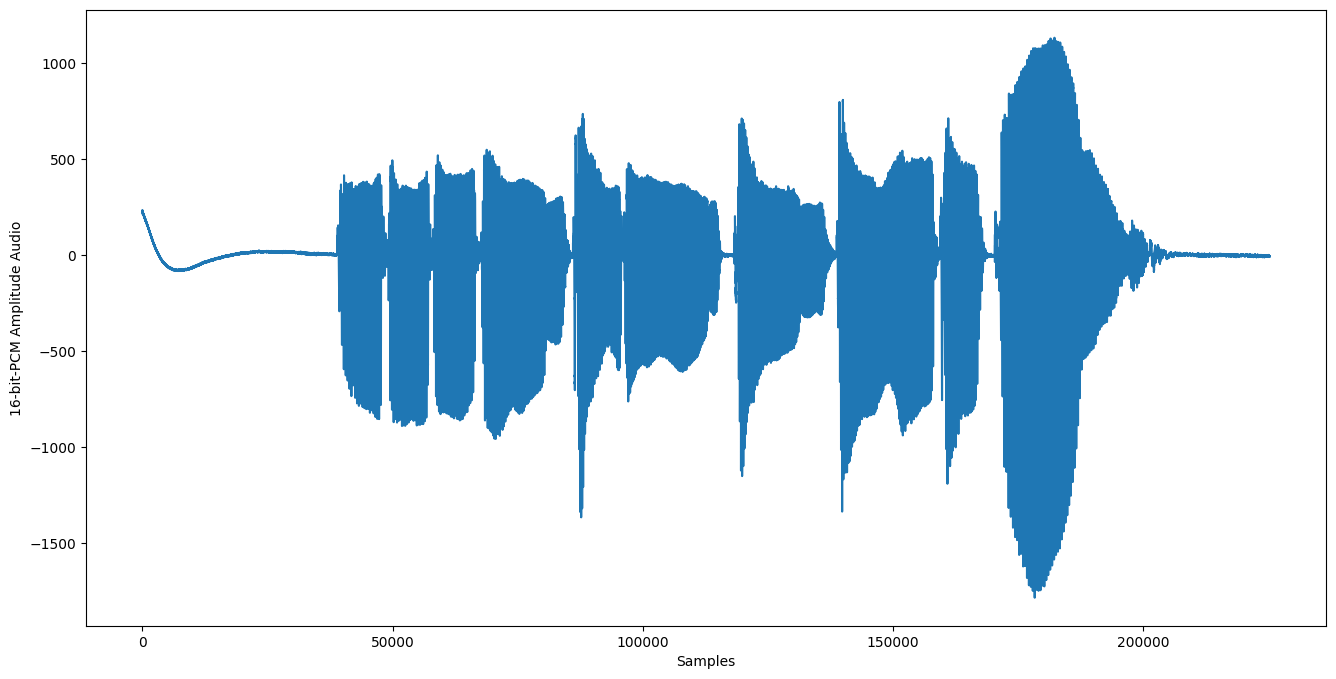

In [13]:
# Nr. 1 a)

path = "Versuch4Daten/aufgabe1a/aufnahme2.npy"

y = np.load(path)

plt.figure(figsize=(16,8))
plt.plot(y)
plt.xlabel("Samples")
plt.ylabel("16-bit-PCM Amplitude Audio")
plt.show()

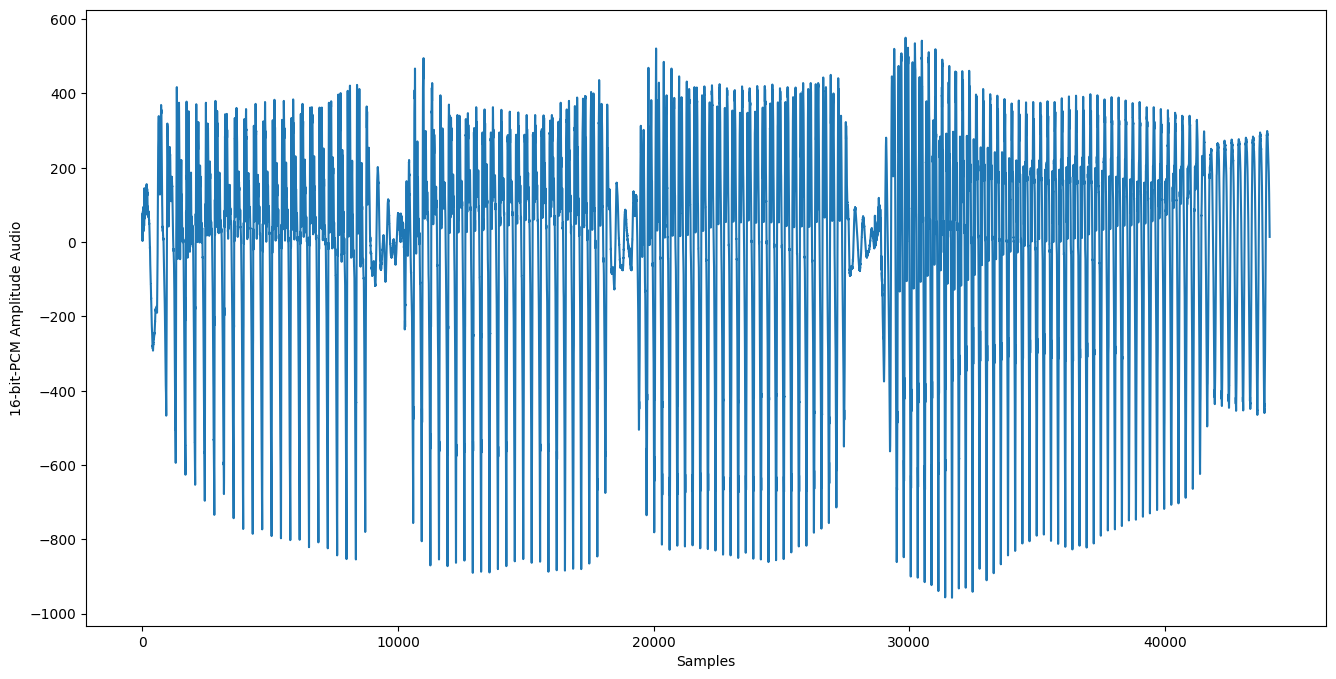

In [15]:
#Nr. 1 b)

y_list = y.tolist()

first20 = 20000
for x in y_list[20000:]:
    if x >= 50 or x <= -50:
        break
    first20 += 1

oneSecond = y_list[first20: first20 + 44100]

plt.figure(figsize=(16,8))
plt.plot(oneSecond)
plt.xlabel("Samples")
plt.ylabel("16-bit-PCM Amplitude Audio")
plt.show()

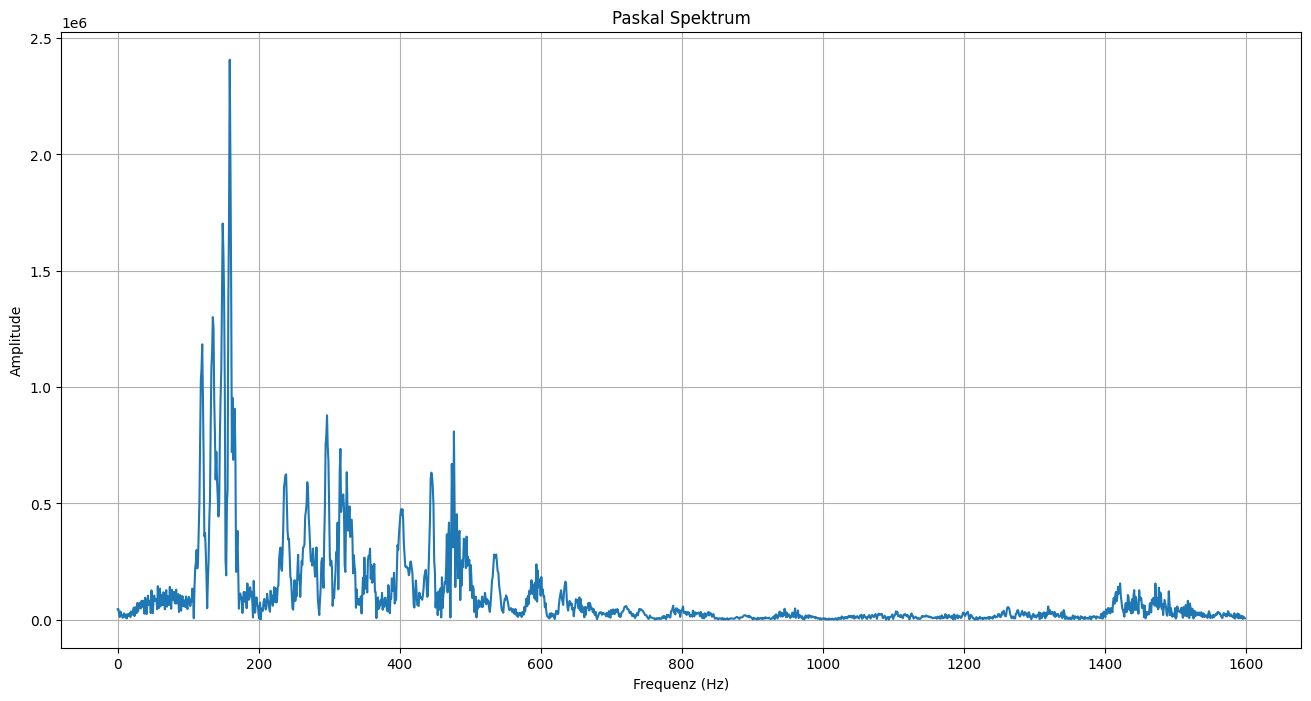

In [111]:
# Nr. 1 c)

fft_values = np.fft.fft(oneSecond)
waves = list(range(0, len(fft_values)))

cut = 1600

waves = list(range(0, len(fft_values)))
m = 44100.
dt = 1. / m
hz = [n / (m * dt)for n in waves]

plt.figure(figsize=(16, 8))
plt.plot(hz[:cut], np.abs(fft_values[:cut]))
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Paskal Spektrum")
plt.show()

In [154]:
print(44100 / 512 - 1)

85.1328125


In [ ]:

amplitude_values = ...
M = len(amplitude_values)
delta_t = zeit_zwischen_zwei_messungen_in_sekunden 

fft_result = np.fft.fft(amplitude_values)
amplitude_spectrum = np.abs(fft_result) / M

frequencies = np.array(range(M))
for n in range(M):
    frequencies[n] = n / (M * delta_t)
    
positive_freqs = frequencies[:M // 2]
positive_amplitudes = amplitude_spectrum[:M // 2]

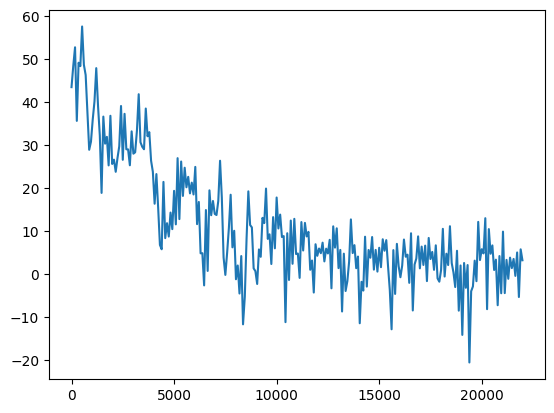

In [174]:
# Nr. 1 d)

fs = 44100
window_size = 512
overlap = window_size // 2
std_dev = window_size / 4


def gaussian_window(length, std_dev):
    n = np.arange(length)
    center = (length - 1) / 2
    window = np.exp(-0.5 * ((n - center) / std_dev) ** 2)
    return window


abschnitte = [
    oneSecond[i:i + window_size]
    for i in range(0, len(oneSecond) - window_size + 1, overlap)
]


gaus = gaussian_window(window_size, std_dev)


gaus_fenster = np.array([abschnitt * gaus for abschnitt in abschnitte])

durchschnitt = np.mean(gaus_fenster, axis=0)


######
amplitude_values = durchschnitt
M = len(amplitude_values)
delta_t = 1. / 44100.

fft_result = np.fft.fft(amplitude_values)
amplitude_spectrum = 20 * np.log10(np.abs(fft_result))

frequencies = np.array(range(M))
for n in range(M):
    frequencies[n] = n / (M * delta_t)
    
positive_freqs = frequencies[:M // 2]
positive_amplitudes = amplitude_spectrum[:M // 2]

plt.plot(positive_freqs, positive_amplitudes)
plt.show()


######






In [108]:
data = []
for i in range(1, 6):
    path = "Versuch4Daten/hoch/hoch1.npy"
    y = np.load(path)
    data.append(y)

freq_spectren = np.array(list(map(lambda x: window_spektrum(x), data)))



mittel = np.mean(freq_spectren, axis=0)
mittel_test = np.mean(freq_spectren)



[     0.            86.1328125    172.265625     258.3984375
    344.53125      430.6640625    516.796875     602.9296875
    689.0625       775.1953125    861.328125     947.4609375
   1033.59375     1119.7265625   1205.859375    1291.9921875
   1378.125       1464.2578125   1550.390625    1636.5234375
   1722.65625     1808.7890625   1894.921875    1981.0546875
   2067.1875      2153.3203125   2239.453125    2325.5859375
   2411.71875     2497.8515625   2583.984375    2670.1171875
   2756.25        2842.3828125   2928.515625    3014.6484375
   3100.78125     3186.9140625   3273.046875    3359.1796875
   3445.3125      3531.4453125   3617.578125    3703.7109375
   3789.84375     3875.9765625   3962.109375    4048.2421875
   4134.375       4220.5078125   4306.640625    4392.7734375
   4478.90625     4565.0390625   4651.171875    4737.3046875
   4823.4375      4909.5703125   4995.703125    5081.8359375
   5167.96875     5254.1015625   5340.234375    5426.3671875
   5512.5         5598.6

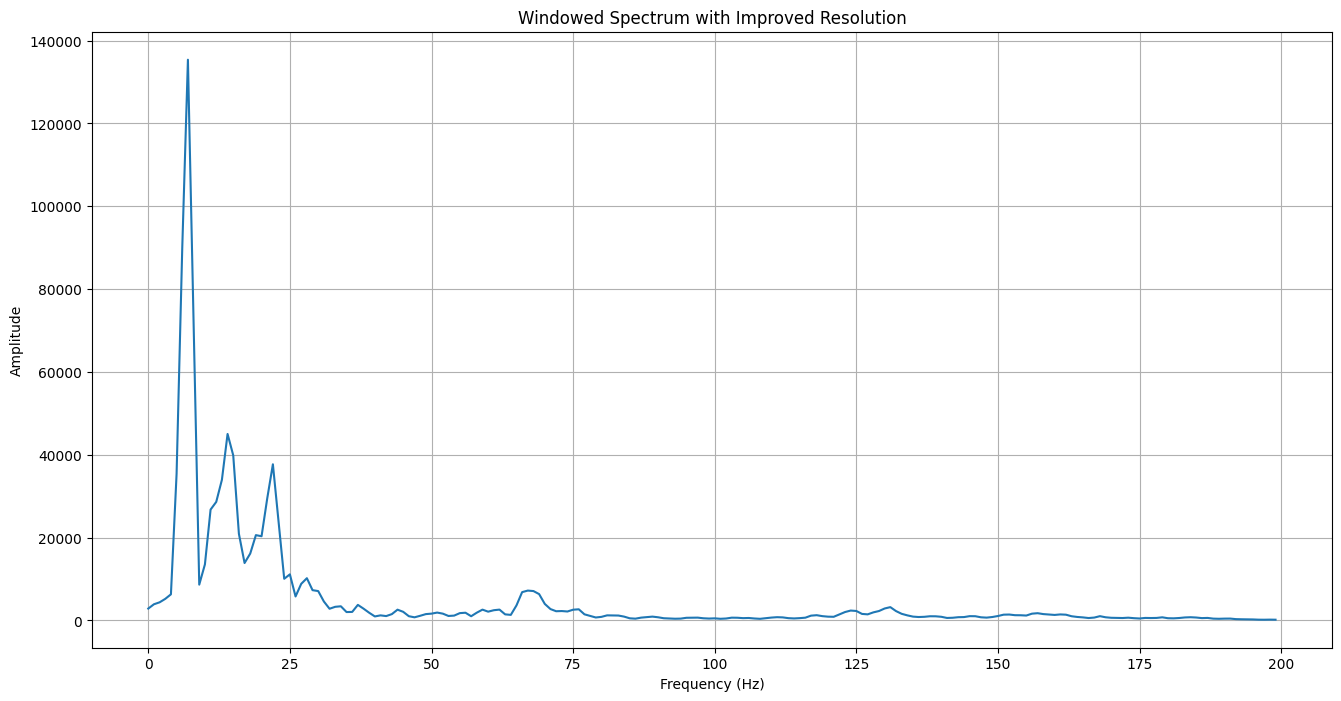

In [132]:
import numpy as np
import matplotlib.pyplot as plt

def window_spektrum(zeitbereich):
    fs = 44100  # Sampling frequency
    window_size = 2048  # Vergrößerte Fenstergröße für bessere Frequenzauflösung
    overlap = window_size // 2  # Überlappung bleibt gleich
    std_dev = window_size / 4
    
    # Gaussian window function
    def gaussian_window(length, std_dev):
        n = np.arange(length)
        center = (length - 1) / 2
        window = np.exp(-0.5 * ((n - center) / std_dev) ** 2)
        return window
    
    # Splitting the time range into overlapping sections
    abschnitte = [
        zeitbereich[i:i + window_size]
        for i in range(0, len(zeitbereich) - window_size + 1, overlap)
    ]
    
    # Applying Gaussian window to each section
    gaus = gaussian_window(window_size, std_dev)
    
    # Perform FFT for each windowed section
    fft_fenster = np.array([np.fft.fft(abschnitt * gaus) for abschnitt in abschnitte])
    
    # Calculate the average of the absolute values of the FFTs
    durchschnitt = np.mean(np.abs(fft_fenster), axis=0)

    return durchschnitt

# Assuming `oneSecond` is the input signal (e.g., a time-domain signal)
# Example: oneSecond = np.random.randn(44100)  # Replace with actual signal

durch = window_spektrum(oneSecond)

# Frequency bins for plotting
waves = list(range(0, len(durch)))
m = 44100.  # Sampling rate
dt = 1. / m
hz = [n / (m * dt) for n in waves]

# Plotting the spectrum with increased cut for better resolution
cut = 200  # Höherer cut-Wert für detaillierteres Spektrum
plt.figure(figsize=(16, 8))
plt.plot(hz[:cut], np.abs(durch[:cut]))  # Plot the magnitude of the spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Windowed Spectrum with Improved Resolution")
plt.show()


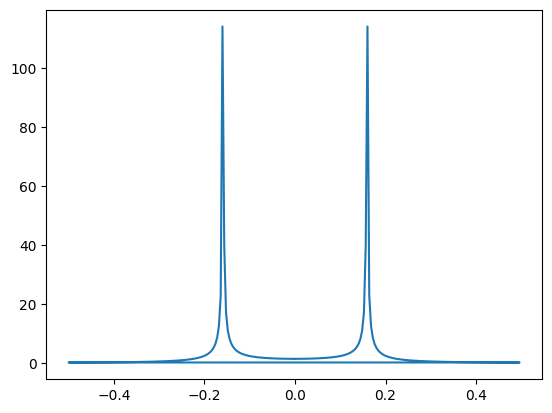

In [153]:
m = 256

t = np.arange(m)
sp = np.abs(np.fft.fft(np.sin(t)))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp)
plt.show()


amplitude_values = ...
M = len(amplitude_values)
delta_t = zeit_zwischen_zwei_messungen_in_sekunden 

fft_result = np.fft.fft(amplitude_values)
amplitude_spectrum = np.abs(fft_result) / M

frequencies = np.array(range(M))
for n in range(M):
    frequencies[n] = n / (M * delta_t)
    
positive_freqs = frequencies[:M // 2]
positive_amplitudes = amplitude_spectrum[:M // 2]